<a href="https://colab.research.google.com/github/satishgc227/Derby-project/blob/main/Real_Horse_problem_solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from imblearn.over_sampling  import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout



In [2]:
df=pd.read_csv("/content/edited complete.csv",encoding='latin')

In [3]:
df.describe()

race_number   trakus_index      latitude     longitude   distance_id   \
count  61540.000000   61540.000000  61540.000000  61540.000000  61540.000000   
mean       4.704160     218.096620     41.219042    -73.787228    900.067436   
std        2.769447     168.287173      0.992559      0.045759    361.264317   
min        1.000000       1.000000     40.666762    -73.832555    550.000000   
25%        2.000000      97.000000     40.672536    -73.829623    700.000000   
50%        5.000000     193.000000     40.675606    -73.827101    800.000000   
75%        7.000000     295.000000     40.717363    -73.727583    900.000000   
max       12.000000    1062.000000     43.073949    -73.716037   2000.000000   

       run_up_distance            purse    post_time   weight_carried   \
count      61540.000000    61540.000000  61540.000000     61540.000000   
mean          58.005086    65021.026974    529.565632       124.794589   
std           35.479152    86343.097859    386.586089         9.943548   
min            0.000000    16000.000000    102.000000       111.000000   
25%           44.000000    36000.000000    240.000000       120.000000   
50%           54.000000    52000.000000    400.000000       122.000000   
75%           77.000000    67000.000000    555.000000       124.000000   
max          171.000000  1000000.000000   1259.000000       156.000000   

               odds  position_at_finish   
count  61539.000000         61539.000000  
mean    1801.096540             4.896943  
std     2111.782825             2.374520  
min       35.000000             1.000000  
25%      480.000000             3.000000  
50%      970.000000             5.000000  
75%     2120.000000             6.000000  
max    12150.000000            11.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61540 entries, 0 to 61539
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             61540 non-null  object 
 1   race_date            61540 non-null  object 
 2   race_number          61540 non-null  int64  
 3   program_number       61540 non-null  object 
 4   trakus_index         61540 non-null  int64  
 5   latitude             61540 non-null  float64
 6   longitude            61540 non-null  float64
 7   distance_id          61540 non-null  int64  
 8   course_type          61540 non-null  object 
 9   track_condition      61540 non-null  object 
 10  run_up_distance      61540 non-null  int64  
 11  race_type            61540 non-null  object 
 12  purse                61540 non-null  int64  
 13  post_time            61540 non-null  int64  
 14  weight_carried       61540 non-null  int64  
 15  jockey               61540 non-null 

In [5]:
df.shape

(61540, 18)

In [6]:
fig = px.scatter(df, 
                   x='course_type',
                   y='odds',
                   color='odds',
                   template='seaborn',
                   labels={"course_type": "Course Type", "odds":"Odds"},
                   title='Winning Odds and Course Type ')

fig.update_layout(xaxis_title="Course Type ",yaxis_title="Odds")
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})

fig.show()

In [7]:
fig = px.scatter(df, 
                   y='purse',
                   x='race_number\xa0',
                   color='purse',
                   template='ggplot2',
                   labels={"purse": "Purse", 'race_number\xa0': "Race Number"},
                   title='Purse and Race Number')



fig.show()


In [8]:
fig = px.scatter(df, 
                   y='odds',
                   x='race_number\xa0',
                   color='odds',
                   template='plotly_white',
                   labels={"odds": "Odds", 'race_number\xa0': "Race Number"},
                   title='Winning Odds and Race Number')
fig.show()

In [9]:
fig = px.scatter(df, 
                   y='odds',
                   x='race_date',
                 color='odds',
                   template='ygridoff',
                   labels={"odds": "Odds", 'race_date': "Race Date"},
                   title='Winning Odds and Race Date')
fig.show()

In [10]:
fig = px.scatter(df, 
                   x='race_number\xa0',
                   y='run_up_distance\xa0',
                   color='run_up_distance\xa0',
                   template='ggplot2',
                   labels={"race_number\xa0": "Race Number", 'run_up_distance\xa0': "Run Up Distance"},
                   title='Run Up Distance and Race Number')


fig.show()

In [11]:
fig = px.histogram(df, 
                   y='weight_carried\xa0',
                   x="track_condition\xa0",
                   
                   log_y=True,
                   text_auto=True,
                   template='simple_white',
                   labels={"weight_carried\xa0": "Weight Carried", "track_condition\xa0":"Track Condition"},
                   title='Weight Carried and Track Condition')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [12]:
print('The Average Weight Carried is',np.around(np.mean(df['weight_carried\xa0']),2))

The Average Weight Carried is 124.79


In [13]:
fig = px.scatter(df, 
                   x='race_type\xa0',
                   y="weight_carried\xa0",
                   
                  template='simple_white',
                  labels={"race_type\xa0": "Race Type", "weight_carried\xa0":"Weight Carried"})
                   

fig.update_layout(xaxis_title="Race Type ",yaxis_title="Weight Carried")

fig.show()

In [14]:
fig = px.histogram(df, 
                   y='run_up_distance\xa0',
                   x='track_condition\xa0',
                  
                   log_y=True,
                   text_auto=True,
                   template='simple_white',
                   labels={"run_up_distance\xa0": "Run Up Distance", "track_condition\xa0":"Track Condition"},
                   title='Run Up Distance and Track Condition')

fig.update_layout(xaxis_title="Track Condition ",yaxis_title="Run Up Distance", bargap=0.1)

fig.show()

In [15]:
#sns.kdeplot(data=df,x='latitude\xa0',y='longitude\xa0',shade=True ,shade_lowest=False,cbar=True)

Data Preprocessing:


In [16]:
df.dtypes

track_id                object
race_date               object
race_number              int64
program_number          object
trakus_index             int64
latitude               float64
longitude              float64
distance_id              int64
course_type             object
track_condition         object
run_up_distance          int64
race_type               object
purse                    int64
post_time                int64
weight_carried           int64
jockey                  object
odds                   float64
position_at_finish     float64
dtype: object

In [17]:
df['race_type\xa0'].unique()
df['course_type'].unique()
df['track_condition\xa0'].unique()
df['track_id'].unique()

s=df[['race_type\xa0','course_type','track_condition\xa0','track_id']]


In [18]:
ohe=OneHotEncoder()
feature_array=ohe.fit_transform(df[['race_type\xa0','course_type','track_condition\xa0','track_id']]).toarray()

In [19]:
feature_labels=ohe.categories_
print(feature_labels)

[array(['ALW', 'AOC', 'CLM', 'SST', 'STK', 'STR', 'WCL'], dtype=object), array(['D', 'I', 'M', 'O', 'T'], dtype=object), array(['FM ', 'FT ', 'GD ', 'MY ', 'SY ', 'YL '], dtype=object), array(['AQU', 'BEL', 'SAR'], dtype=object)]


In [20]:
np.array(feature_labels).flatten()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



array([array(['ALW', 'AOC', 'CLM', 'SST', 'STK', 'STR', 'WCL'], dtype=object),
       array(['D', 'I', 'M', 'O', 'T'], dtype=object),
       array(['FM ', 'FT ', 'GD ', 'MY ', 'SY ', 'YL '], dtype=object),
       array(['AQU', 'BEL', 'SAR'], dtype=object)], dtype=object)

In [21]:
np.hstack(feature_labels)

array(['ALW', 'AOC', 'CLM', 'SST', 'STK', 'STR', 'WCL', 'D', 'I', 'M',
       'O', 'T', 'FM ', 'FT ', 'GD ', 'MY ', 'SY ', 'YL ', 'AQU', 'BEL',
       'SAR'], dtype=object)

In [22]:
feature_labels=np.hstack(feature_labels)


In [23]:
f=pd.DataFrame(feature_array,columns=feature_labels)

In [24]:
pd.concat([df,f],axis=1)

track_id   race_date  race_number  program_number   trakus_index   \
0          AQU  01-01-2019             9               6             73   
1          AQU  01-01-2019             9               6             74   
2          AQU  01-01-2019             9               6             63   
3          AQU  01-01-2019             9               6             64   
4          AQU  01-01-2019             9               6             65   
...        ...         ...           ...             ...            ...   
61535      BEL  20-06-2019             1               3             44   
61536      BEL  20-06-2019             1               3             45   
61537      BEL  20-06-2019             1               3             46   
61538      BEL  20-06-2019             1               3             35   
61539      BEL  20-06-2019             1               3             36   

       latitude   longitude   distance_id  course_type track_condition   ...  \
0      40.672946  -73.827587           600           D              GD   ...   
1      40.672990  -73.827568           600           D              GD   ...   
2      40.672510  -73.827781           600           D              GD   ...   
3      40.672553  -73.827762           600           D              GD   ...   
4      40.672596  -73.827742           600           D              GD   ...   
...          ...         ...           ...         ...              ...  ...   
61535  40.716197  -73.719304           800           D              MY   ...   
61536  40.716211  -73.719359           800           D              MY   ...   
61537  40.716225  -73.719415           800           D              MY   ...   
61538  40.716067  -73.718805           800           D              MY   ...   
61539  40.716081  -73.718860           800           D              MY   ...   

         T  FM   FT   GD   MY   SY   YL   AQU  BEL  SAR  
0      0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
1      0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
2      0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
3      0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
4      0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
61535  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
61536  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
61537  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
61538  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
61539  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  

[61540 rows x 39 columns]

In [25]:
km=KMeans()


In [26]:
df.drop(['race_date','track_id','course_type','track_condition\xa0','race_type\xa0'],axis=1,inplace=True)

In [27]:
df=pd.concat([df,f],axis=1)

In [28]:

df.dtypes
df.drop(['jockey\xa0','program_number\xa0'],axis=1,inplace=True)
df

race_number   trakus_index   latitude   longitude   distance_id   \
0                 9             73  40.672946  -73.827587           600   
1                 9             74  40.672990  -73.827568           600   
2                 9             63  40.672510  -73.827781           600   
3                 9             64  40.672553  -73.827762           600   
4                 9             65  40.672596  -73.827742           600   
...             ...            ...        ...         ...           ...   
61535             1             44  40.716197  -73.719304           800   
61536             1             45  40.716211  -73.719359           800   
61537             1             46  40.716225  -73.719415           800   
61538             1             35  40.716067  -73.718805           800   
61539             1             36  40.716081  -73.718860           800   

       run_up_distance   purse  post_time   weight_carried     odds  ...    T  \
0                    48  25000         420              120  2090.0  ...  0.0   
1                    48  25000         420              120  2090.0  ...  0.0   
2                    48  25000         420              120  2090.0  ...  0.0   
3                    48  25000         420              120  2090.0  ...  0.0   
4                    48  25000         420              120  2090.0  ...  0.0   
...                 ...    ...         ...              ...     ...  ...  ...   
61535                52  50000         305              123   830.0  ...  0.0   
61536                52  50000         305              123   830.0  ...  0.0   
61537                52  50000         305              123   830.0  ...  0.0   
61538                52  50000         305              123   830.0  ...  0.0   
61539                52  50000         305              123     NaN  ...  0.0   

       FM   FT   GD   MY   SY   YL   AQU  BEL  SAR  
0      0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
1      0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
2      0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
3      0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
4      0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  
61535  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
61536  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
61537  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
61538  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
61539  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  

[61540 rows x 32 columns]

In [29]:
df.dropna(inplace=True)


In [38]:
#Standardise the data 
df=StandardScaler().fit_transform(df)
df

array([[ 1.55115552, -0.86222233, -0.55019961, ...,  0.9882232 ,
        -0.60990545, -0.5356447 ],
       [ 1.55115552, -0.85628005, -0.55015495, ...,  0.9882232 ,
        -0.60990545, -0.5356447 ],
       [ 1.55115552, -0.92164513, -0.55063909, ...,  0.9882232 ,
        -0.60990545, -0.5356447 ],
       ...,
       [-1.33755024, -1.02860618, -0.50661036, ..., -1.01191715,
         1.63959839, -0.5356447 ],
       [-1.33755024, -1.0226639 , -0.5065957 , ..., -1.01191715,
         1.63959839, -0.5356447 ],
       [-1.33755024, -1.08802898, -0.50675522, ..., -1.01191715,
         1.63959839, -0.5356447 ]])

Text(0, 0.5, 'Variance %')

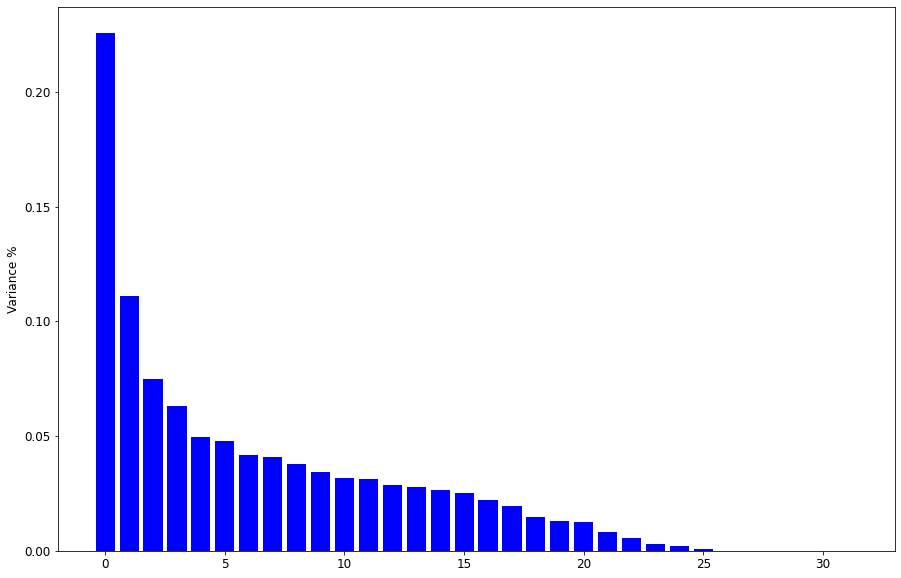

In [48]:
#Principal Components
df.shape
from sklearn.decomposition import PCA
pca=PCA(n_components=32)
df=pca.fit_transform(df)
featuress=range(pca.n_components_)
featuress
plt.bar(featuress,pca.explained_variance_ratio_,color='blue')
plt.xlabel=('PCA features')
plt.ylabel('Variance %')


As we can see the maximum number of data is explained by just by 15 components ,rest all can be neglected.


In [63]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    
    km.fit_predict(df)
    wcss.append(km.inertia_)
    print('For', i,'Cluster,', np.around(km.inertia_,2),'is the WCSS.')

For 1 Cluster, 1969248.0 is the WCSS.
For 2 Cluster, 1569899.69 is the WCSS.
For 3 Cluster, 1383587.28 is the WCSS.
For 4 Cluster, 1296116.53 is the WCSS.
For 5 Cluster, 1209883.9 is the WCSS.
For 6 Cluster, 1123156.48 is the WCSS.
For 7 Cluster, 1057217.88 is the WCSS.
For 8 Cluster, 981966.67 is the WCSS.
For 9 Cluster, 929817.88 is the WCSS.
For 10 Cluster, 868185.12 is the WCSS.


In [64]:
fig = px.line(x = range(1,11),
              y=wcss, 
              template='simple_white',
              title = 'Elbow Plot', markers=True,
             color_discrete_sequence=["skyblue"])

fig.update_layout(xaxis_title="Clusters",yaxis_title=" WCSS")


fig.show()

In [65]:
km = KMeans(n_clusters=6)
y_means = km.fit_predict(df)
y_means

array([2, 2, 2, ..., 5, 5, 5], dtype=int32)

In [72]:
df['Target'] = y_means
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

IndexError: ignored

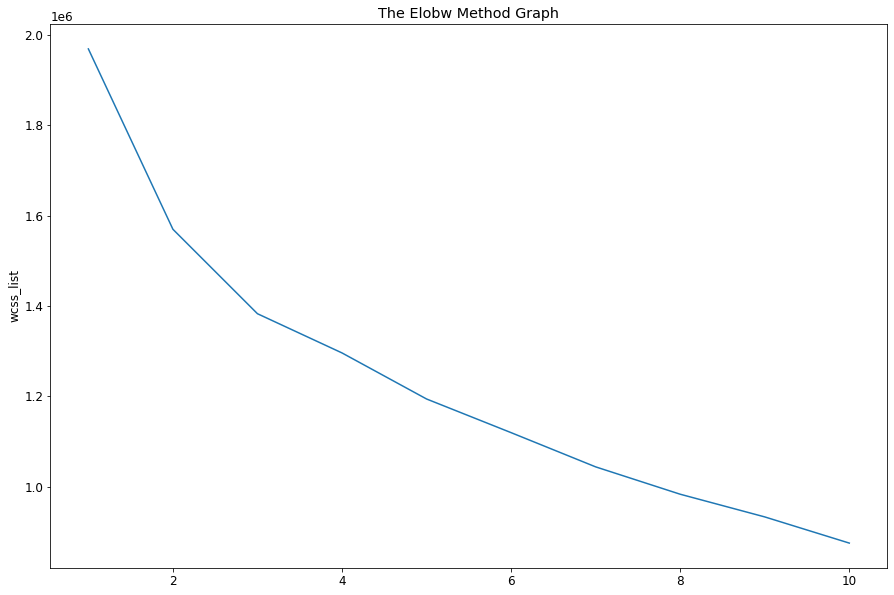

In [68]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
#plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(df)  

In [ ]:
#visulaizing the clusters  
#plt.scatter(df[y_predict == 0, 0], df[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
#plt.scatter(df[y_predict == 1, 0], df[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
#plt.scatter(df[y_predict== 2, 0], df
#            [y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
#plt.scatter(df[y_predict == 3, 0], df[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
#plt.scatter(df[y_predict == 4, 0], df[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
#plt.title('Clusters of customers')  
#plt.xlabel('Annual Income (k$)')  
#plt.ylabel('Spending Score (1-100)')  
#plt.legend()  
#plt.show()  